# Vegetations time-series released by World Food Programme (WFP) 

The data regarding the vegetations are provided by WFP: https://dataviz.vam.wfp.org/seasonal_explorer/rainfall_vegetation/visualizations#

For more details, see the *README.md*.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("default")

In [2]:
# Add the python path to the folder containing some custom packages.
import sys
sys.path.insert(0, "../../packages/")
from MapPlot.MapPlot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

### NDVI

In [4]:
# Read the data released by wfp regarding the ndvi stored in the 'WFP_data' folder.
path = "./WFP_data/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_subfolders = glob.glob(path + country + "/NDVI/*")
    for subfolder in all_subfolders:
        adminstrata = ntpath.basename(subfolder).split(".")[0]
        # All the files of the years.
        all_files = glob.glob(subfolder + "/*.csv")
        for filename in all_files:
            df = pd.read_csv(filename, index_col = False)
            df["AdminStrata"] = adminstrata
            df["Country"] = country
            dfs.append(df)
            
ndvi = pd.concat(dfs, axis = 0, ignore_index = True)

### NDVI Anomaly

In [5]:
# Read the data released by wfp regarding the ndvi anomalies stored in the 'WFP_data' folder.
path = "./WFP_data/"
all_folders = glob.glob(path + "*")

dfs = []

for folder in all_folders:
    country = ntpath.basename(folder).split(".")[0]
    all_subfolders = glob.glob(path + country + "/NDVI anomaly/*")
    for subfolder in all_subfolders:
        adminstrata = ntpath.basename(subfolder).split(".")[0]
        # All the files of the years.
        all_files = glob.glob(subfolder + "/*.csv")
        for filename in all_files:
            df = pd.read_csv(filename, usecols = range(4), index_col = False) 
            df["AdminStrata"] = adminstrata
            df["Country"] = country
            dfs.append(df)
            
ndvi_anomalies = pd.concat(dfs, axis = 0, ignore_index = True)

In [6]:
# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True)
df = pd.merge(ndvi, ndvi_anomalies, on = ["Year", "Month", "Dekad", "AdminStrata", "Country"])
# Delete the duplicate rows of the dataframe (some date have duplicate information due to loading data from different files).
df.drop_duplicates(inplace = True)

In [7]:
# Select only the data beyond this year.
year = 2018
df = df.loc[df.Year >= year]
df.head()

,Year,Month,Dekad,NDVI,Average,AdminStrata,Country,NDVI Anomaly
8,2018,1,1,0.302146,0.279089,Boucle-Du-Mouhoun,Burkina Faso,107.006383
9,2018,1,1,0.302146,0.279089,Boucle-Du-Mouhoun,Burkina Faso,100.099213
13,2018,1,1,0.279415,0.279089,Boucle-Du-Mouhoun,Burkina Faso,107.006383
14,2018,1,1,0.279415,0.279089,Boucle-Du-Mouhoun,Burkina Faso,100.099213
33,2018,1,2,0.252167,0.271402,Boucle-Du-Mouhoun,Burkina Faso,94.015225


### Brief items description

- *Year*: reference year of the data collection;
- *Month*: reference month of the data collection;
- *Dekad*: reference month dekad of the data collection: these correspond to the calendar dates 1-10 (dekad 1), 11-20 (dekad 2), and 21-end of each month (dekad 3);
- *NDVI*: NDVI index in the reference period;
- *Average*: long-term NDVI index for the same period starting from 2002 to 2013;
- *NDVI Anomaly*: the value of the NDVI anomaly;
- *AdminStrata*: the administrative regions information.
- *Country*: the country information.

### Country item

In [8]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Cameroon, Mali, Niger, Nigeria, Syria, Yemen


### AdminStrata item

In [9]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the administrative regions of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago. The vegetation dataframe has the values of all the administrative regions.

In [10]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran',
       'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah',
       "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz'], dtype=object)

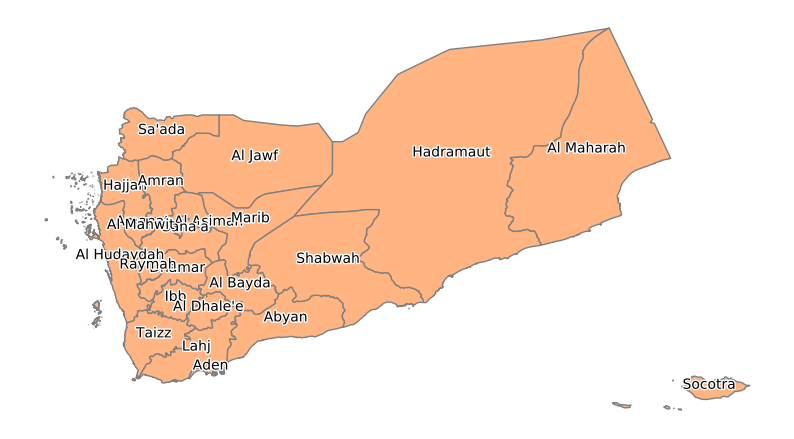

In [11]:
# Plot map.
draw_adminstratas(country = "Yemen", adminstratas = AdminStratas["Yemen"], adminstratas_to_highlight = None,
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Yemen/administrative_level_1/Yemen.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_ndvi_yemen.png", 
                  dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The vegetation dataframe has the values of all 13 administrative regions.

In [12]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Boucle-Du-Mouhoun', 'Cascades', 'Centre', 'Centre-Est',
       'Centre-Nord', 'Centre-Ouest', 'Centre-Sud', 'Est',
       'Hauts-Bassins', 'Nord', 'Plateau-Central', 'Sahel', 'Sud-Ouest'],
      dtype=object)

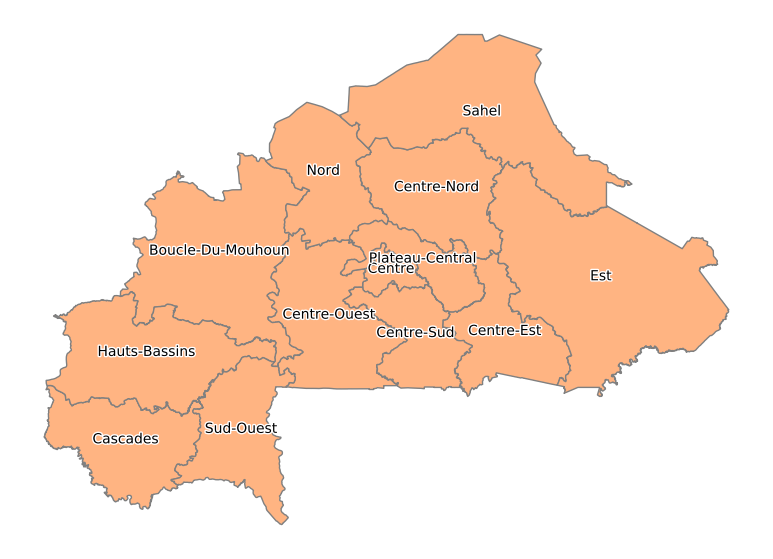

In [13]:
# Plot map.
draw_adminstratas(country = "Burkina Faso", adminstratas = AdminStratas["Burkina Faso"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Burkina Faso/administrative_level_1/Burkina Faso.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_ndvi_burkina.png", 
                  dpi = 300)

- **Cameroon (CMR)**: the administrative regions of Cameroon are 10. The vegetation dataframe has the values of all the 10 administrative regions.

In [14]:
print(AdminStratas["Cameroon"].shape)
AdminStratas["Cameroon"]

(10,)


array(['Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North',
       'North-West', 'South', 'South-West', 'West'], dtype=object)

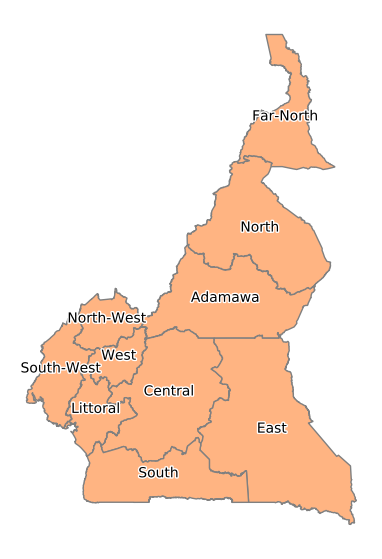

In [15]:
# Plot map.
draw_adminstratas(country = "Cameroon", adminstratas = AdminStratas["Cameroon"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Cameroon/administrative_level_1/Cameroon.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Cameroon/map_ndvi_cameroon.png", 
                  dpi = 300)

- **Mali (MLI)**: Mali is divided into eight regions and one capital district (Bamako). The AdminStrata items of the vegetation dataframe cover all 9 regions.

In [16]:
print(AdminStratas["Mali"].shape)
AdminStratas["Mali"]

(9,)


array(['Bamako', 'Gao-Menaka', 'Kayes', 'Kidal', 'Koulikoro', 'Mopti',
       'Segou', 'Sikasso', 'Tombouctou-Taoudeni'], dtype=object)

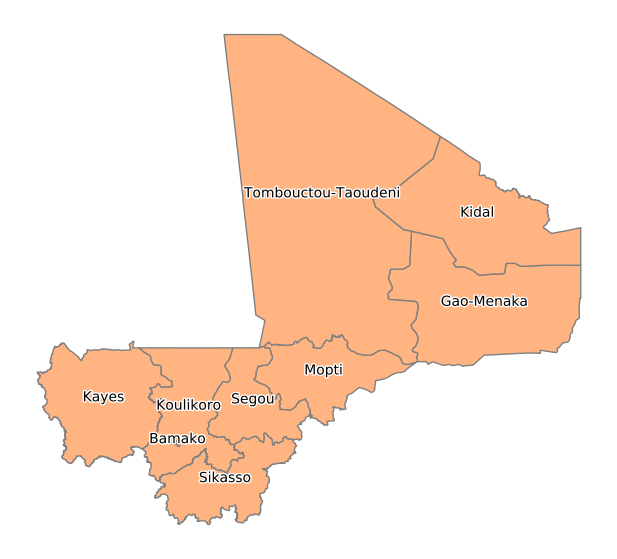

In [17]:
# Plot map.
draw_adminstratas(country = "Mali", adminstratas = AdminStratas["Mali"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Mali/administrative_level_1/Mali.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Mali/map_ndvi_mali.png", 
                  dpi = 300)

- **Niger (NER)**: the administrative regions of Niger are 8. The vegetation dataframe has the values of all the 8 administrative regions.

In [18]:
print(AdminStratas["Niger"].shape)
AdminStratas["Niger"]

(8,)


array(['Agadez', 'Diffa', 'Dosso', 'Maradi', 'Niamey', 'Tahoua',
       'Tillaberi', 'Zinder'], dtype=object)

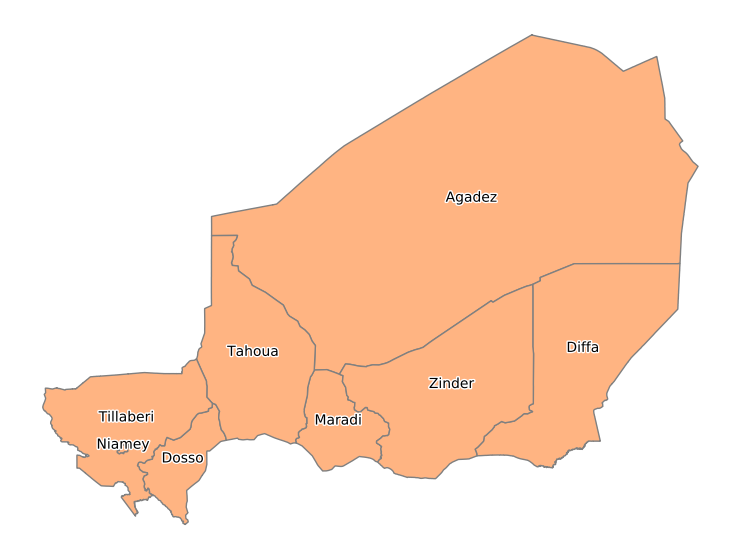

In [19]:
# Plot map.
draw_adminstratas(country = "Niger", adminstratas = AdminStratas["Niger"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Niger/administrative_level_1", figsize = (10, 7), annotation = True, 
                  annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Niger/map_ndvi_niger.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 administrative regions. It also includes The Federal Capital Territory that is under the direct control of the federal government. We have collected only the vegetation data of 3 administrative regions: Adamawa, Borno and Yobe.

In [20]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(3,)


array(['Adamawa', 'Borno', 'Yobe'], dtype=object)

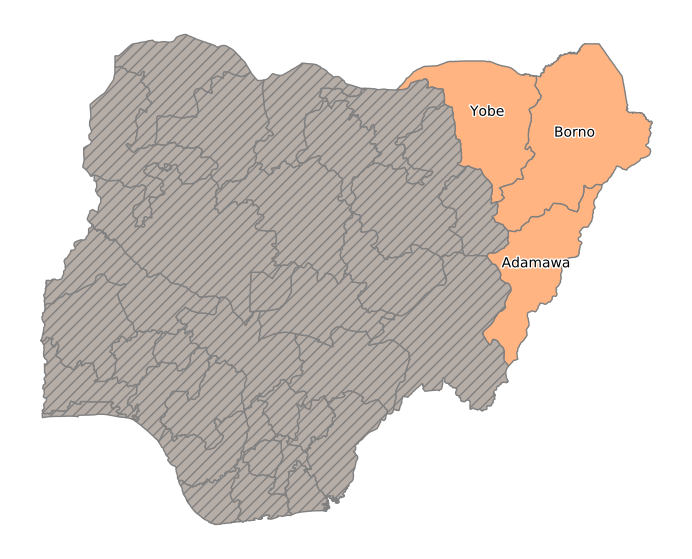

In [21]:
# Plot map.
draw_adminstratas(country = "Nigeria", adminstratas = AdminStratas["Nigeria"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Nigeria/administrative_level_1", 
                  figsize = (10, 7), annotation = True, annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_ndvi_nigeria.png", 
                  dpi = 300)

- **Syria (SYR)**: the administrative regions of the Syria country are 14. The NDVI dataframe has the values of 13 administrative regions (Idleb administrative region not included).

In [22]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Al-Hasakeh', 'Aleppo', 'Ar-Raqqa', 'As-Sweida', 'Damascus',
       "Dar'a", 'Deir-ez-Zor', 'Hama', 'Homs', 'Lattakia', 'Quneitra',
       'Rural Damascus', 'Tartous'], dtype=object)

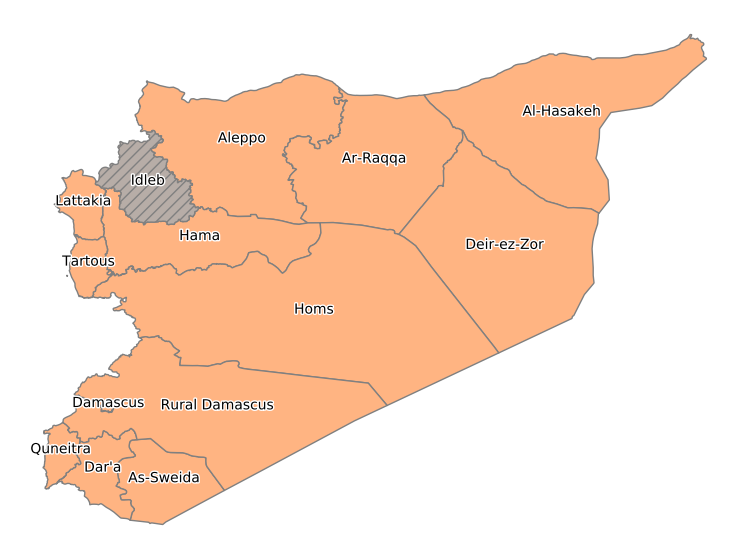

In [23]:
# Plot map.
draw_adminstratas(country = "Syria", adminstratas = AdminStratas["Syria"], adminstratas_to_highlight = None, 
                  folder_to_shapefiles = "../1. Shape Files/output_shapefiles/Syria/administrative_level_1/Syria.shp", 
                  figsize = (10, 7), annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_ndvi_syria.png", 
                  dpi = 300)

## Creation of the time-series

In [24]:
# Convert the dekad to proper pandas datetime format.
# These correspond to the calendar dates 1-10, 11-20, and 21-end of each month.
def dekad_to_day(row):
    date = pd.to_datetime("%d-%d-01" % (row["Year"], row["Month"]))
    end_month = date.days_in_month
    dekad = row.Dekad   
    if dekad == 1:
        return 10
    if dekad == 2:
        return 20
    if dekad == 3:
        return end_month
    
df["Day"] = df.apply(dekad_to_day, axis = 1)

In [25]:
# Adjusting the dataframe.
df.drop(columns = ["Dekad", "Average"], inplace = True)
data = pd.to_datetime(df[["Year", "Month", "Day"]])
df.insert(1, "Datetime", data)
df.drop(["Year", "Month", "Day"], axis = 1, inplace = True)
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,NDVI,AdminStrata,Country,NDVI Anomaly
0,2018-01-10,0.302146,Boucle-Du-Mouhoun,Burkina Faso,107.006383
1,2018-01-10,0.254309,Centre-Est,Burkina Faso,99.983251
2,2018-01-10,0.254309,Centre-Est,Burkina Faso,97.641935
3,2018-01-10,0.116674,Abyan,Yemen,102.292707
4,2018-01-10,0.116674,Abyan,Yemen,99.742663


In [26]:
# Resampling the data to daily frequency.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,NDVI,NDVI Anomaly
0,Burkina Faso,Boucle-Du-Mouhoun,2018-01-10,0.29078,103.552798
1,Burkina Faso,Boucle-Du-Mouhoun,2018-01-11,NaN,NaN
2,Burkina Faso,Boucle-Du-Mouhoun,2018-01-12,NaN,NaN
3,Burkina Faso,Boucle-Du-Mouhoun,2018-01-13,NaN,NaN
4,Burkina Faso,Boucle-Du-Mouhoun,2018-01-14,NaN,NaN


In [27]:
# Create multi-index column dataframe.
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"]).reorder_levels([1, 2, 0], axis = 1).sort_index(axis = 1, level = [0, 1, 2])
df.columns.rename("Country", level = 0, inplace = True)
df.columns.rename("AdminStrata", level = 1, inplace = True)
df.columns.rename("Indicator", level = 2, inplace = True)
freq = "D"
df.index.freq = freq
df.head()

Country          Burkina Faso                                                \
AdminStrata Boucle-Du-Mouhoun               Cascades                 Centre   
Indicator                NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime                                                                      
2018-01-10            0.29078   103.552798  0.379815   102.985594  0.243653   
2018-01-11                NaN          NaN       NaN          NaN       NaN   
2018-01-12                NaN          NaN       NaN          NaN       NaN   
2018-01-13                NaN          NaN       NaN          NaN       NaN   
2018-01-14                NaN          NaN       NaN          NaN       NaN   

Country                                                                    \
AdminStrata              Centre-Est              Centre-Nord                
Indicator   NDVI Anomaly       NDVI NDVI Anomaly        NDVI NDVI Anomaly   
Datetime                                                                    
2018-01-10    101.278044   0.257957    98.812593    0.212629    99.245613   
2018-01-11           NaN        NaN          NaN         NaN          NaN   
2018-01-12           NaN        NaN          NaN         NaN          NaN   
2018-01-13           NaN        NaN          NaN         NaN          NaN   
2018-01-14           NaN        NaN          NaN         NaN          NaN   

Country      ...     Yemen                                                \
AdminStrata  ...    Sa'ada                 Sana'a                Shabwah   
Indicator    ...      NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime     ...                                                           
2018-01-10   ...  0.140757   104.070799  0.148818   103.143571  0.118788   
2018-01-11   ...       NaN          NaN       NaN          NaN       NaN   
2018-01-12   ...       NaN          NaN       NaN          NaN       NaN   
2018-01-13   ...       NaN          NaN       NaN          NaN       NaN   
2018-01-14   ...       NaN          NaN       NaN          NaN       NaN   

Country                                                                 
AdminStrata                Socotra                  Taizz               
Indicator   NDVI Anomaly      NDVI NDVI Anomaly      NDVI NDVI Anomaly  
Datetime                                                                
2018-01-10    104.650775  0.275747     100.6596  0.184924   103.444085  
2018-01-11           NaN       NaN          NaN       NaN          NaN  
2018-01-12           NaN       NaN          NaN       NaN          NaN  
2018-01-13           NaN       NaN          NaN       NaN          NaN  
2018-01-14           NaN       NaN          NaN       NaN          NaN  

[5 rows x 156 columns]

In [28]:
# Keep the dekads date.
df = df.loc[(df.index.day == 10) | (df.index.day == 20) | (df.index.is_month_end)]
df.head()

Country          Burkina Faso                                                \
AdminStrata Boucle-Du-Mouhoun               Cascades                 Centre   
Indicator                NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime                                                                      
2018-01-10           0.290780   103.552798  0.379815   102.985594  0.243653   
2018-01-20           0.252167    94.015225  0.326278    94.301148  0.220776   
2018-01-31           0.243936    95.537867  0.314308    97.158104  0.213455   
2018-02-10           0.240367    96.358211  0.313643    98.616388  0.209919   
2018-02-20           0.238610    97.727229  0.317977   100.470164  0.207765   

Country                                                                    \
AdminStrata              Centre-Est              Centre-Nord                
Indicator   NDVI Anomaly       NDVI NDVI Anomaly        NDVI NDVI Anomaly   
Datetime                                                                    
2018-01-10    101.278044   0.257957    98.812593    0.212629    99.245613   
2018-01-20     95.134291   0.243555    96.306835    0.199676    95.722325   
2018-01-31     95.906131   0.233588    96.790352    0.194086    96.133982   
2018-02-10     96.303218   0.229758    97.226370    0.191083    96.242876   
2018-02-20     97.270695   0.228399    98.416356    0.189289    97.000431   

Country      ...     Yemen                                                \
AdminStrata  ...    Sa'ada                 Sana'a                Shabwah   
Indicator    ...      NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime     ...                                                           
2018-01-10   ...  0.140757   104.070799  0.148818   103.143571  0.118788   
2018-01-20   ...  0.137154   102.658314  0.141121   100.194023  0.113069   
2018-01-31   ...  0.137290   103.945359  0.137444   100.468617  0.111471   
2018-02-10   ...  0.136458   104.242425  0.135784   100.708709  0.110780   
2018-02-20   ...  0.135451   104.547420  0.135236   101.521371  0.110236   

Country                                                                 
AdminStrata                Socotra                  Taizz               
Indicator   NDVI Anomaly      NDVI NDVI Anomaly      NDVI NDVI Anomaly  
Datetime                                                                
2018-01-10    104.650775  0.275747   100.659600  0.184924   103.444085  
2018-01-20    101.391589  0.253105    95.699072  0.175443   100.937593  
2018-01-31    101.028739  0.236899    94.890266  0.164091    99.317827  
2018-02-10    100.901704  0.228059    94.313534  0.159406    99.169962  
2018-02-20    100.844906  0.220515    94.202991  0.156037    99.820356  

[5 rows x 156 columns]

In [29]:
# Now check if it is necessary interpolate the NaN values at dekadly frequency.
# Check if the dataframe contains NaN values in correspondence of the dekades.
check_nan = df.groupby(axis = 1, level = [0, 1, 2]).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()].isnull().sum(axis = 1).sum())
check_nan

Country       AdminStrata        Indicator   
Burkina Faso  Boucle-Du-Mouhoun  NDVI            1
                                 NDVI Anomaly    1
              Cascades           NDVI            1
                                 NDVI Anomaly    1
              Centre             NDVI            1
                                                ..
Yemen         Shabwah            NDVI Anomaly    1
              Socotra            NDVI            1
                                 NDVI Anomaly    1
              Taizz              NDVI            1
                                 NDVI Anomaly    1
Length: 156, dtype: int64

In [30]:
# Total NaN values.
check_nan.sum()

156

In [31]:
# Let's interpolate the NaN values using a linear interpolation up to a limit of 3 dekads.
def interpolation(group):  
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear", limit = 3)    
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 1)
    return group

df_interpolate = df.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(interpolation)
df_interpolate.head()

Country          Burkina Faso                                                \
AdminStrata Boucle-Du-Mouhoun               Cascades                 Centre   
Indicator                NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime                                                                      
2018-01-10           0.290780   103.552798  0.379815   102.985594  0.243653   
2018-01-20           0.252167    94.015225  0.326278    94.301148  0.220776   
2018-01-31           0.243936    95.537867  0.314308    97.158104  0.213455   
2018-02-10           0.240367    96.358211  0.313643    98.616388  0.209919   
2018-02-20           0.238610    97.727229  0.317977   100.470164  0.207765   

Country                                                                    \
AdminStrata              Centre-Est              Centre-Nord                
Indicator   NDVI Anomaly       NDVI NDVI Anomaly        NDVI NDVI Anomaly   
Datetime                                                                    
2018-01-10    101.278044   0.257957    98.812593    0.212629    99.245613   
2018-01-20     95.134291   0.243555    96.306835    0.199676    95.722325   
2018-01-31     95.906131   0.233588    96.790352    0.194086    96.133982   
2018-02-10     96.303218   0.229758    97.226370    0.191083    96.242876   
2018-02-20     97.270695   0.228399    98.416356    0.189289    97.000431   

Country      ...     Yemen                                                \
AdminStrata  ...    Sa'ada                 Sana'a                Shabwah   
Indicator    ...      NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime     ...                                                           
2018-01-10   ...  0.140757   104.070799  0.148818   103.143571  0.118788   
2018-01-20   ...  0.137154   102.658314  0.141121   100.194023  0.113069   
2018-01-31   ...  0.137290   103.945359  0.137444   100.468617  0.111471   
2018-02-10   ...  0.136458   104.242425  0.135784   100.708709  0.110780   
2018-02-20   ...  0.135451   104.547420  0.135236   101.521371  0.110236   

Country                                                                 
AdminStrata                Socotra                  Taizz               
Indicator   NDVI Anomaly      NDVI NDVI Anomaly      NDVI NDVI Anomaly  
Datetime                                                                
2018-01-10    104.650775  0.275747   100.659600  0.184924   103.444085  
2018-01-20    101.391589  0.253105    95.699072  0.175443   100.937593  
2018-01-31    101.028739  0.236899    94.890266  0.164091    99.317827  
2018-02-10    100.901704  0.228059    94.313534  0.159406    99.169962  
2018-02-20    100.844906  0.220515    94.202991  0.156037    99.820356  

[5 rows x 156 columns]

In [32]:
# Check if the dataframe contains NaN values.
check_nan = df_interpolate.groupby(axis = 1, level = [0, 1, 2]).apply(lambda x: x.loc[x.first_valid_index():x.last_valid_index()].isnull().sum(axis = 1).sum())
check_nan.sum()

0

In [33]:
# Resample data to daily level (as before) reobtaining the dekadly frequency.
df_dekad = df_interpolate.groupby(axis = 1, level = [0, 1, 2], group_keys = False).resample("D").mean()
freq = "D"
df_dekad.index.freq = freq
df_dekad.head()

Country          Burkina Faso                                                \
AdminStrata Boucle-Du-Mouhoun               Cascades                 Centre   
Indicator                NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime                                                                      
2018-01-10            0.29078   103.552798  0.379815   102.985594  0.243653   
2018-01-11                NaN          NaN       NaN          NaN       NaN   
2018-01-12                NaN          NaN       NaN          NaN       NaN   
2018-01-13                NaN          NaN       NaN          NaN       NaN   
2018-01-14                NaN          NaN       NaN          NaN       NaN   

Country                                                                    \
AdminStrata              Centre-Est              Centre-Nord                
Indicator   NDVI Anomaly       NDVI NDVI Anomaly        NDVI NDVI Anomaly   
Datetime                                                                    
2018-01-10    101.278044   0.257957    98.812593    0.212629    99.245613   
2018-01-11           NaN        NaN          NaN         NaN          NaN   
2018-01-12           NaN        NaN          NaN         NaN          NaN   
2018-01-13           NaN        NaN          NaN         NaN          NaN   
2018-01-14           NaN        NaN          NaN         NaN          NaN   

Country      ...     Yemen                                                \
AdminStrata  ...    Sa'ada                 Sana'a                Shabwah   
Indicator    ...      NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime     ...                                                           
2018-01-10   ...  0.140757   104.070799  0.148818   103.143571  0.118788   
2018-01-11   ...       NaN          NaN       NaN          NaN       NaN   
2018-01-12   ...       NaN          NaN       NaN          NaN       NaN   
2018-01-13   ...       NaN          NaN       NaN          NaN       NaN   
2018-01-14   ...       NaN          NaN       NaN          NaN       NaN   

Country                                                                 
AdminStrata                Socotra                  Taizz               
Indicator   NDVI Anomaly      NDVI NDVI Anomaly      NDVI NDVI Anomaly  
Datetime                                                                
2018-01-10    104.650775  0.275747     100.6596  0.184924   103.444085  
2018-01-11           NaN       NaN          NaN       NaN          NaN  
2018-01-12           NaN       NaN          NaN       NaN          NaN  
2018-01-13           NaN       NaN          NaN       NaN          NaN  
2018-01-14           NaN       NaN          NaN       NaN          NaN  

[5 rows x 156 columns]

In [34]:
# Plot time-series.
TsIP(df_dekad).interactive_plot_df(matplotlib = False, style = "mix", yaxis = "NDVI", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [35]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [36]:
# Save the time-series.
df_dekad.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_NDVI-dekad"));

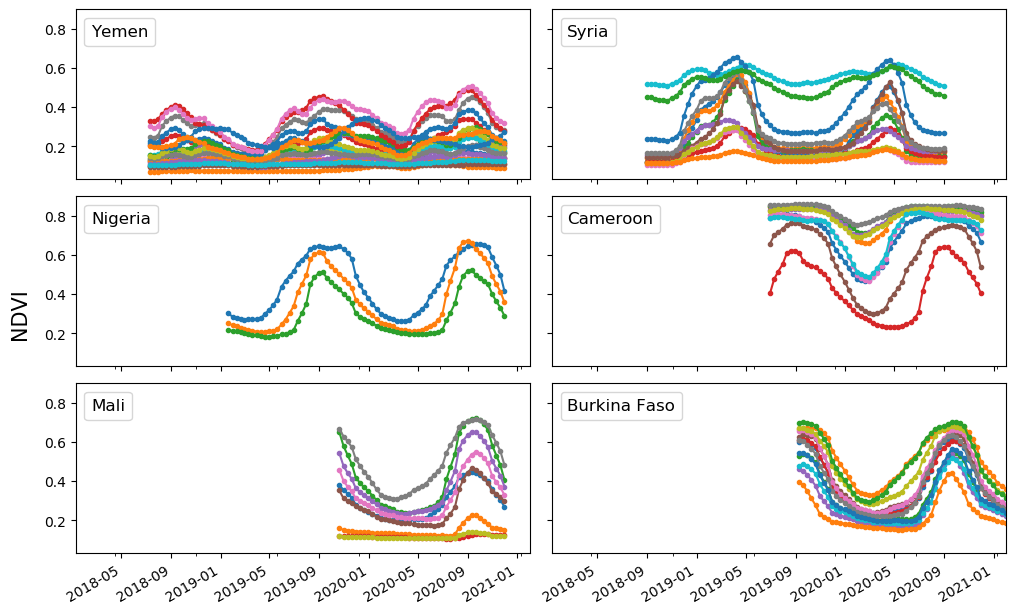

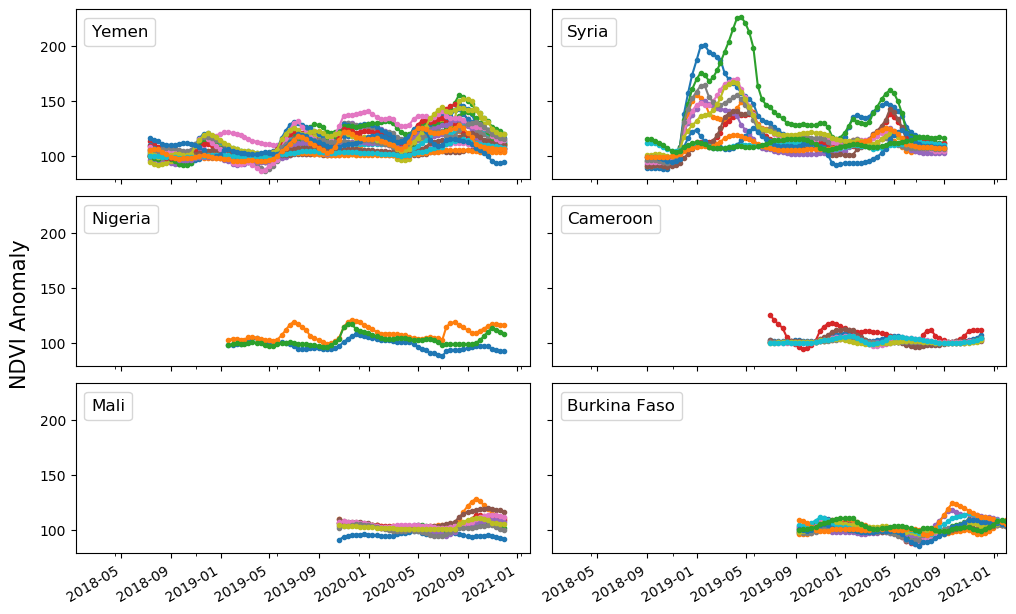

In [37]:
# Define the end reference end period of forecasting analysis.
ref_str = {"Yemen": "2018-07-02", "Syria": "2018-08-31", "Nigeria": "2019-01-18", 
           "Cameroon": "2019-06-30", "Mali": "2019-10-20", "Burkina Faso": "2019-09-08"}
ref_end = {"Yemen": "2020-11-30", "Syria": "2020-08-31", "Nigeria": "2020-11-30", 
           "Cameroon": "2020-11-30", "Mali": "2020-11-30", "Burkina Faso": "2021-01-31"}

cols = df_dekad.columns.get_level_values(2).unique()

for ind in cols:
    df_ind = df_dekad.xs(ind, axis = 1, level = 2, drop_level = False)
    # Plot the original time-series of the FCG indicator for each country.
    fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 8), sharex = True, sharey = True)
    fig.subplots_adjust(hspace = .1, wspace = .05)
    axs = axs.ravel()
    for i, country in enumerate(ref_end.keys()):
        df_plot = df_ind[country].loc[ref_str[country]:ref_end[country]]
        df_plot.dropna().plot(ax = axs[i], style = ".-")
        axs[i].set_xlabel("")
        axs[i].legend_ = None
        #axs[i].set_ylim(0, 100)
        axs[i].set_xlim(df.first_valid_index(), "2021-01-31")
        # Legend.
        item = Line2D([0], [0], label = country, color = "k")
        item.set_visible(False)
        axs[i].legend(handles = [item], loc = "upper left", handlelength = 0, 
                      handletextpad = 0, fancybox = True, prop = {"size": 12})

    fig.text(0.07, 0.5, ind, va = "center", rotation = "vertical", 
             fontdict = {"size": 15})
    
    # Save the figure.
    fig.savefig(PATH_TO_SAVE_DATA + f"ts_forecasting_analysis_{ind}.png", dpi = 300, bbox_inches = "tight")

## Conversion to daily time-series

In [38]:
def daily_fit(group):  
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear")    
    return group

df_fit_day = df_dekad.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(daily_fit)
freq = "D"
df_fit_day.index.freq = freq
df_fit_day.head()

Country          Burkina Faso                                                \
AdminStrata Boucle-Du-Mouhoun               Cascades                 Centre   
Indicator                NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime                                                                      
2018-01-10           0.290780   103.552798  0.379815   102.985594  0.243653   
2018-01-11           0.286919   102.599041  0.374461   102.117150  0.241365   
2018-01-12           0.283058   101.645283  0.369107   101.248705  0.239077   
2018-01-13           0.279196   100.691526  0.363754   100.380260  0.236789   
2018-01-14           0.275335    99.737769  0.358400    99.511816  0.234502   

Country                                                                    \
AdminStrata              Centre-Est              Centre-Nord                
Indicator   NDVI Anomaly       NDVI NDVI Anomaly        NDVI NDVI Anomaly   
Datetime                                                                    
2018-01-10    101.278044   0.257957    98.812593    0.212629    99.245613   
2018-01-11    100.663669   0.256517    98.562017    0.211334    98.893284   
2018-01-12    100.049294   0.255077    98.311441    0.210038    98.540955   
2018-01-13     99.434918   0.253637    98.060866    0.208743    98.188627   
2018-01-14     98.820543   0.252196    97.810290    0.207448    97.836298   

Country      ...     Yemen                                                \
AdminStrata  ...    Sa'ada                 Sana'a                Shabwah   
Indicator    ...      NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime     ...                                                           
2018-01-10   ...  0.140757   104.070799  0.148818   103.143571  0.118788   
2018-01-11   ...  0.140397   103.929551  0.148048   102.848616  0.118216   
2018-01-12   ...  0.140037   103.788302  0.147279   102.553661  0.117644   
2018-01-13   ...  0.139676   103.647054  0.146509   102.258707  0.117072   
2018-01-14   ...  0.139316   103.505805  0.145739   101.963752  0.116500   

Country                                                                 
AdminStrata                Socotra                  Taizz               
Indicator   NDVI Anomaly      NDVI NDVI Anomaly      NDVI NDVI Anomaly  
Datetime                                                                
2018-01-10    104.650775  0.275747   100.659600  0.184924   103.444085  
2018-01-11    104.324856  0.273483   100.163547  0.183976   103.193436  
2018-01-12    103.998938  0.271219    99.667495  0.183028   102.942787  
2018-01-13    103.673019  0.268955    99.171442  0.182080   102.692138  
2018-01-14    103.347101  0.266690    98.675389  0.181131   102.441488  

[5 rows x 156 columns]

## Adjustment of the vegetations time-series to the daily time coverage of the FCG <= 2 analysis

Now, we manage the current data keeping only the administrative regions present in the FCG <= 2 analysis. Furthermore, we aggregate data following the FCG <= 2 data collection: the FCG <= 2 value of a certain province corresponding to a referece date does not correspond to the percentage of poor and borderline people on that day, but in a greater time range.

In [39]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    group = group.loc[group.first_valid_index():group.last_valid_index()]
    # Load the information regarding the FCG <= 2 survey.
    fcs_coverage = pd.read_csv("../2. Food Consumption Score (FCS)/output_timeseries/%s/wfp_fcs-SvyDateRange.csv" % country, header = [0, 1], index_col = 0)
    fcs_coverage.index = pd.to_datetime(fcs_coverage.index)
    # Ignore the adminstrata not considered in the FCG <= 2 survey.
    if adminstrata in fcs_coverage.columns.get_level_values(0).unique():
        fcs_coverage_adminstrata = fcs_coverage[adminstrata].loc[fcs_coverage[adminstrata].first_valid_index():fcs_coverage[adminstrata].last_valid_index()]
        # Sliding window according to the coverage of the FCG <= 2 analysis.
        start_svy = fcs_coverage_adminstrata.index[0]
        end_svy = fcs_coverage_adminstrata.index[-1]
        new_group = group.loc[start_svy:end_svy].copy()
        for index in new_group.index:
            look_back = int(fcs_coverage_adminstrata.loc[index].values[0])
            # Window over the column.
            new_group.loc[index] = group.loc[index-(look_back-1)*group.index.freq:index].mean() 
        return new_group
    else:
        pass
    
df_SvyWindow = df_fit_day.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country          Burkina Faso                                            \
AdminStrata Boucle-Du-Mouhoun              Cascades              Centre   
Indicator                NDVI NDVI Anomaly     NDVI NDVI Anomaly   NDVI   
Datetime                                                                  
2018-07-02                NaN          NaN      NaN          NaN    NaN   
2018-07-03                NaN          NaN      NaN          NaN    NaN   
2018-07-04                NaN          NaN      NaN          NaN    NaN   
2018-07-05                NaN          NaN      NaN          NaN    NaN   
2018-07-06                NaN          NaN      NaN          NaN    NaN   

Country                                                                    \
AdminStrata              Centre-Est              Centre-Nord                
Indicator   NDVI Anomaly       NDVI NDVI Anomaly        NDVI NDVI Anomaly   
Datetime                                                                    
2018-07-02           NaN        NaN          NaN         NaN          NaN   
2018-07-03           NaN        NaN          NaN         NaN          NaN   
2018-07-04           NaN        NaN          NaN         NaN          NaN   
2018-07-05           NaN        NaN          NaN         NaN          NaN   
2018-07-06           NaN        NaN          NaN         NaN          NaN   

Country      ...     Yemen                                                \
AdminStrata  ...    Sa'ada                 Sana'a                Shabwah   
Indicator    ...      NDVI NDVI Anomaly      NDVI NDVI Anomaly      NDVI   
Datetime     ...                                                           
2018-07-02   ...  0.151144   107.167892  0.173760   108.018375  0.106316   
2018-07-03   ...  0.150797   107.078176  0.173197   107.964266  0.106252   
2018-07-04   ...  0.150430   106.987607  0.172590   107.895775  0.106184   
2018-07-05   ...  0.150045   106.896187  0.171939   107.812903  0.106115   
2018-07-06   ...  0.149640   106.803915  0.171244   107.715649  0.106044   

Country                                                                 
AdminStrata                Socotra                  Taizz               
Indicator   NDVI Anomaly      NDVI NDVI Anomaly      NDVI NDVI Anomaly  
Datetime                                                                
2018-07-02     99.805487  0.226142   107.804296  0.207995   107.052107  
2018-07-03     99.810932  0.226611   108.054605  0.207854   106.887366  
2018-07-04     99.816966  0.227028   108.316902  0.207691   106.731591  
2018-07-05     99.823587  0.227391   108.591189  0.207505   106.584781  
2018-07-06     99.830797  0.227702   108.877464  0.207295   106.446937  

[5 rows x 154 columns]

In [40]:
# Plot the time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "NDVI", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [41]:
# Save the time-series.
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_NDVI-day"));